In [ ]:
from google.colab import files
uploaded = files.upload()

Saving bank.csv to bank.csv


In [ ]:
import pandas as pd
import numpy as np
Bank = pd.read_csv("bank.csv")
Bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [ ]:
Bank.shape

(4521, 17)

In [ ]:
Bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [ ]:
Bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [ ]:
Bank.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,4521.000000,4521,4521,4521,4521,4521.000000,4521,4521,4521,4521.000000,4521,4521.000000,4521.000000,4521.000000,4521.000000,4521,4521
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,management,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,969,2797,2306,4445,NaN,2559,3830,2896,NaN,1398,NaN,NaN,NaN,NaN,3705,4000
mean,41.170095,NaN,NaN,NaN,NaN,1422.657819,NaN,NaN,NaN,15.915284,NaN,263.961292,2.793630,39.766645,0.542579,NaN,NaN
std,10.576211,NaN,NaN,NaN,NaN,3009.638142,NaN,NaN,NaN,8.247667,NaN,259.856633,3.109807,100.121124,1.693562,NaN,NaN
min,19.000000,NaN,NaN,NaN,NaN,-3313.000000,NaN,NaN,NaN,1.000000,NaN,4.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,69.000000,NaN,NaN,NaN,9.000000,NaN,104.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,444.000000,NaN,NaN,NaN,16.000000,NaN,185.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,49.000000,NaN,NaN,NaN,NaN,1480.000000,NaN,NaN,NaN,21.000000,NaN,329.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [ ]:
# Changing all the YES nd NO to 1 and 0
col = ['default', 'housing', 'loan', 'y']
def convert (x):
  return x.map({'yes':1,'no':0})
Bank[col] = Bank[col].apply(convert)

In [ ]:
Bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,0,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,0,4789,1,1,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,0,1350,1,0,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,0,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,0,0,1,0,unknown,5,may,226,1,-1,0,unknown,0


In [ ]:
Bank['job'].astype("category").value_counts()

In [ ]:
Bank['marital'].astype("category").value_counts()

In [ ]:
Bank['education'].astype("category").value_counts()

In [ ]:
Bank['contact'].astype("category").value_counts()

In [ ]:
Bank['month'].astype("category").value_counts()

In [ ]:
Bank['poutcome'].astype("category").value_counts()

In [ ]:
from pandas.core.arrays import categorical
categorical = Bank.select_dtypes(include=['object'])
categorical.head()

,job,marital,education,contact,month,poutcome
0,unemployed,married,primary,cellular,oct,unknown
1,services,married,secondary,cellular,may,failure
2,management,single,tertiary,cellular,apr,failure
3,management,married,tertiary,unknown,jun,unknown
4,blue-collar,married,secondary,unknown,may,unknown


In [ ]:
# Dummies Variables
dummies = pd.get_dummies(categorical,drop_first=True)
dummies.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [ ]:
check_out = Bank[['age', 'balance', 'day', 'duration', 'campaign', 'pdays','previous']]
check_out.head()

,age,balance,day,duration,campaign,pdays,previous
0,30,1787,19,79,1,-1,0
1,33,4789,11,220,1,339,4
2,35,1350,16,185,1,330,1
3,30,1476,3,199,4,-1,0
4,59,0,5,226,1,-1,0


In [ ]:
check_out.describe(percentiles=[0.25,0.5,0.75,0.90,0.95,0.99])

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
90%,56.000000,3913.000000,28.000000,579.000000,6.000000,183.000000,2.000000
95%,59.000000,6102.000000,30.000000,763.000000,8.000000,317.000000,3.000000
99%,72.000000,14194.600000,31.000000,1259.000000,16.000000,370.000000,8.000000


<Axes: ylabel='previous'>

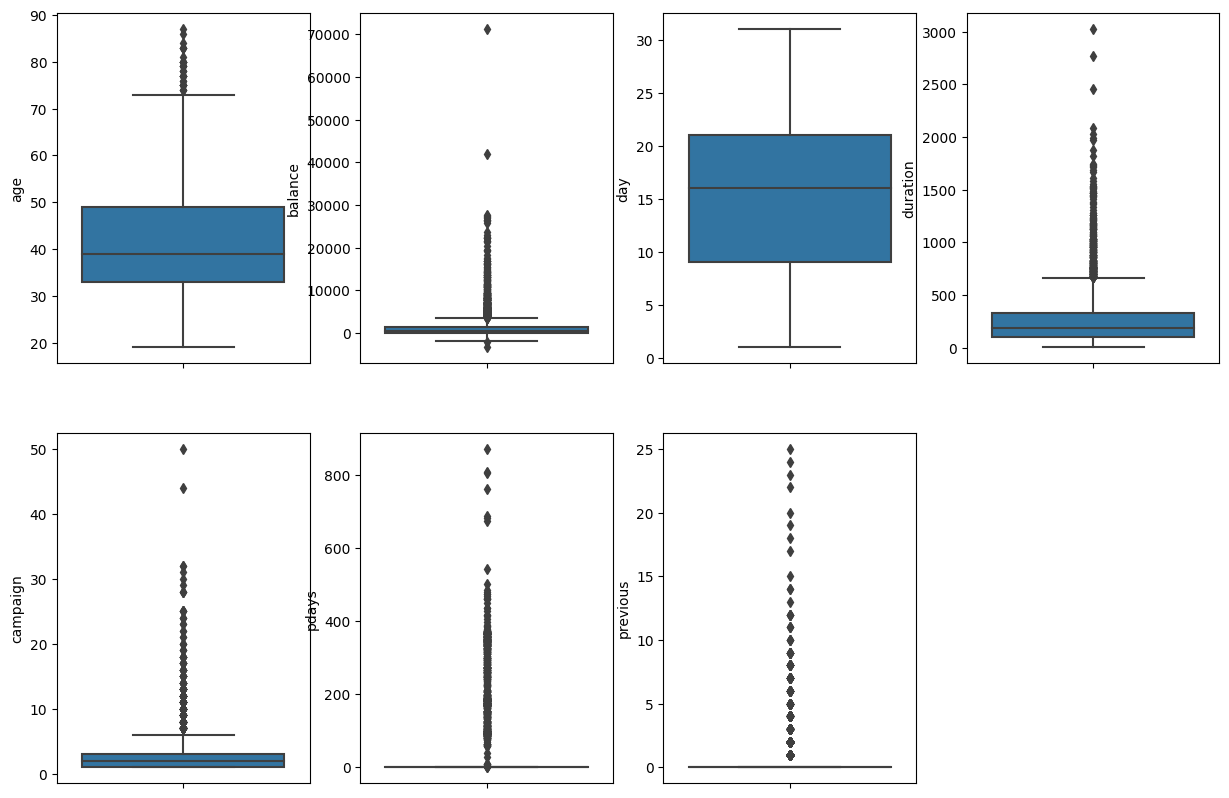

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,10))
plt.subplot(2,4,1)
sns.boxplot(y='age',data=Bank)
plt.subplot(2,4,2)
sns.boxplot(y='balance',data=Bank)
plt.subplot(2,4,3)
sns.boxplot(y='day',data=Bank)
plt.subplot(2,4,4)
sns.boxplot(y='duration',data=Bank)
plt.subplot(2,4,5)
sns.boxplot(y='campaign',data=Bank)
plt.subplot(2,4,6)
sns.boxplot(y='pdays',data=Bank)
plt.subplot(2,4,7)
sns.boxplot(y='previous',data=Bank)

<Axes: >

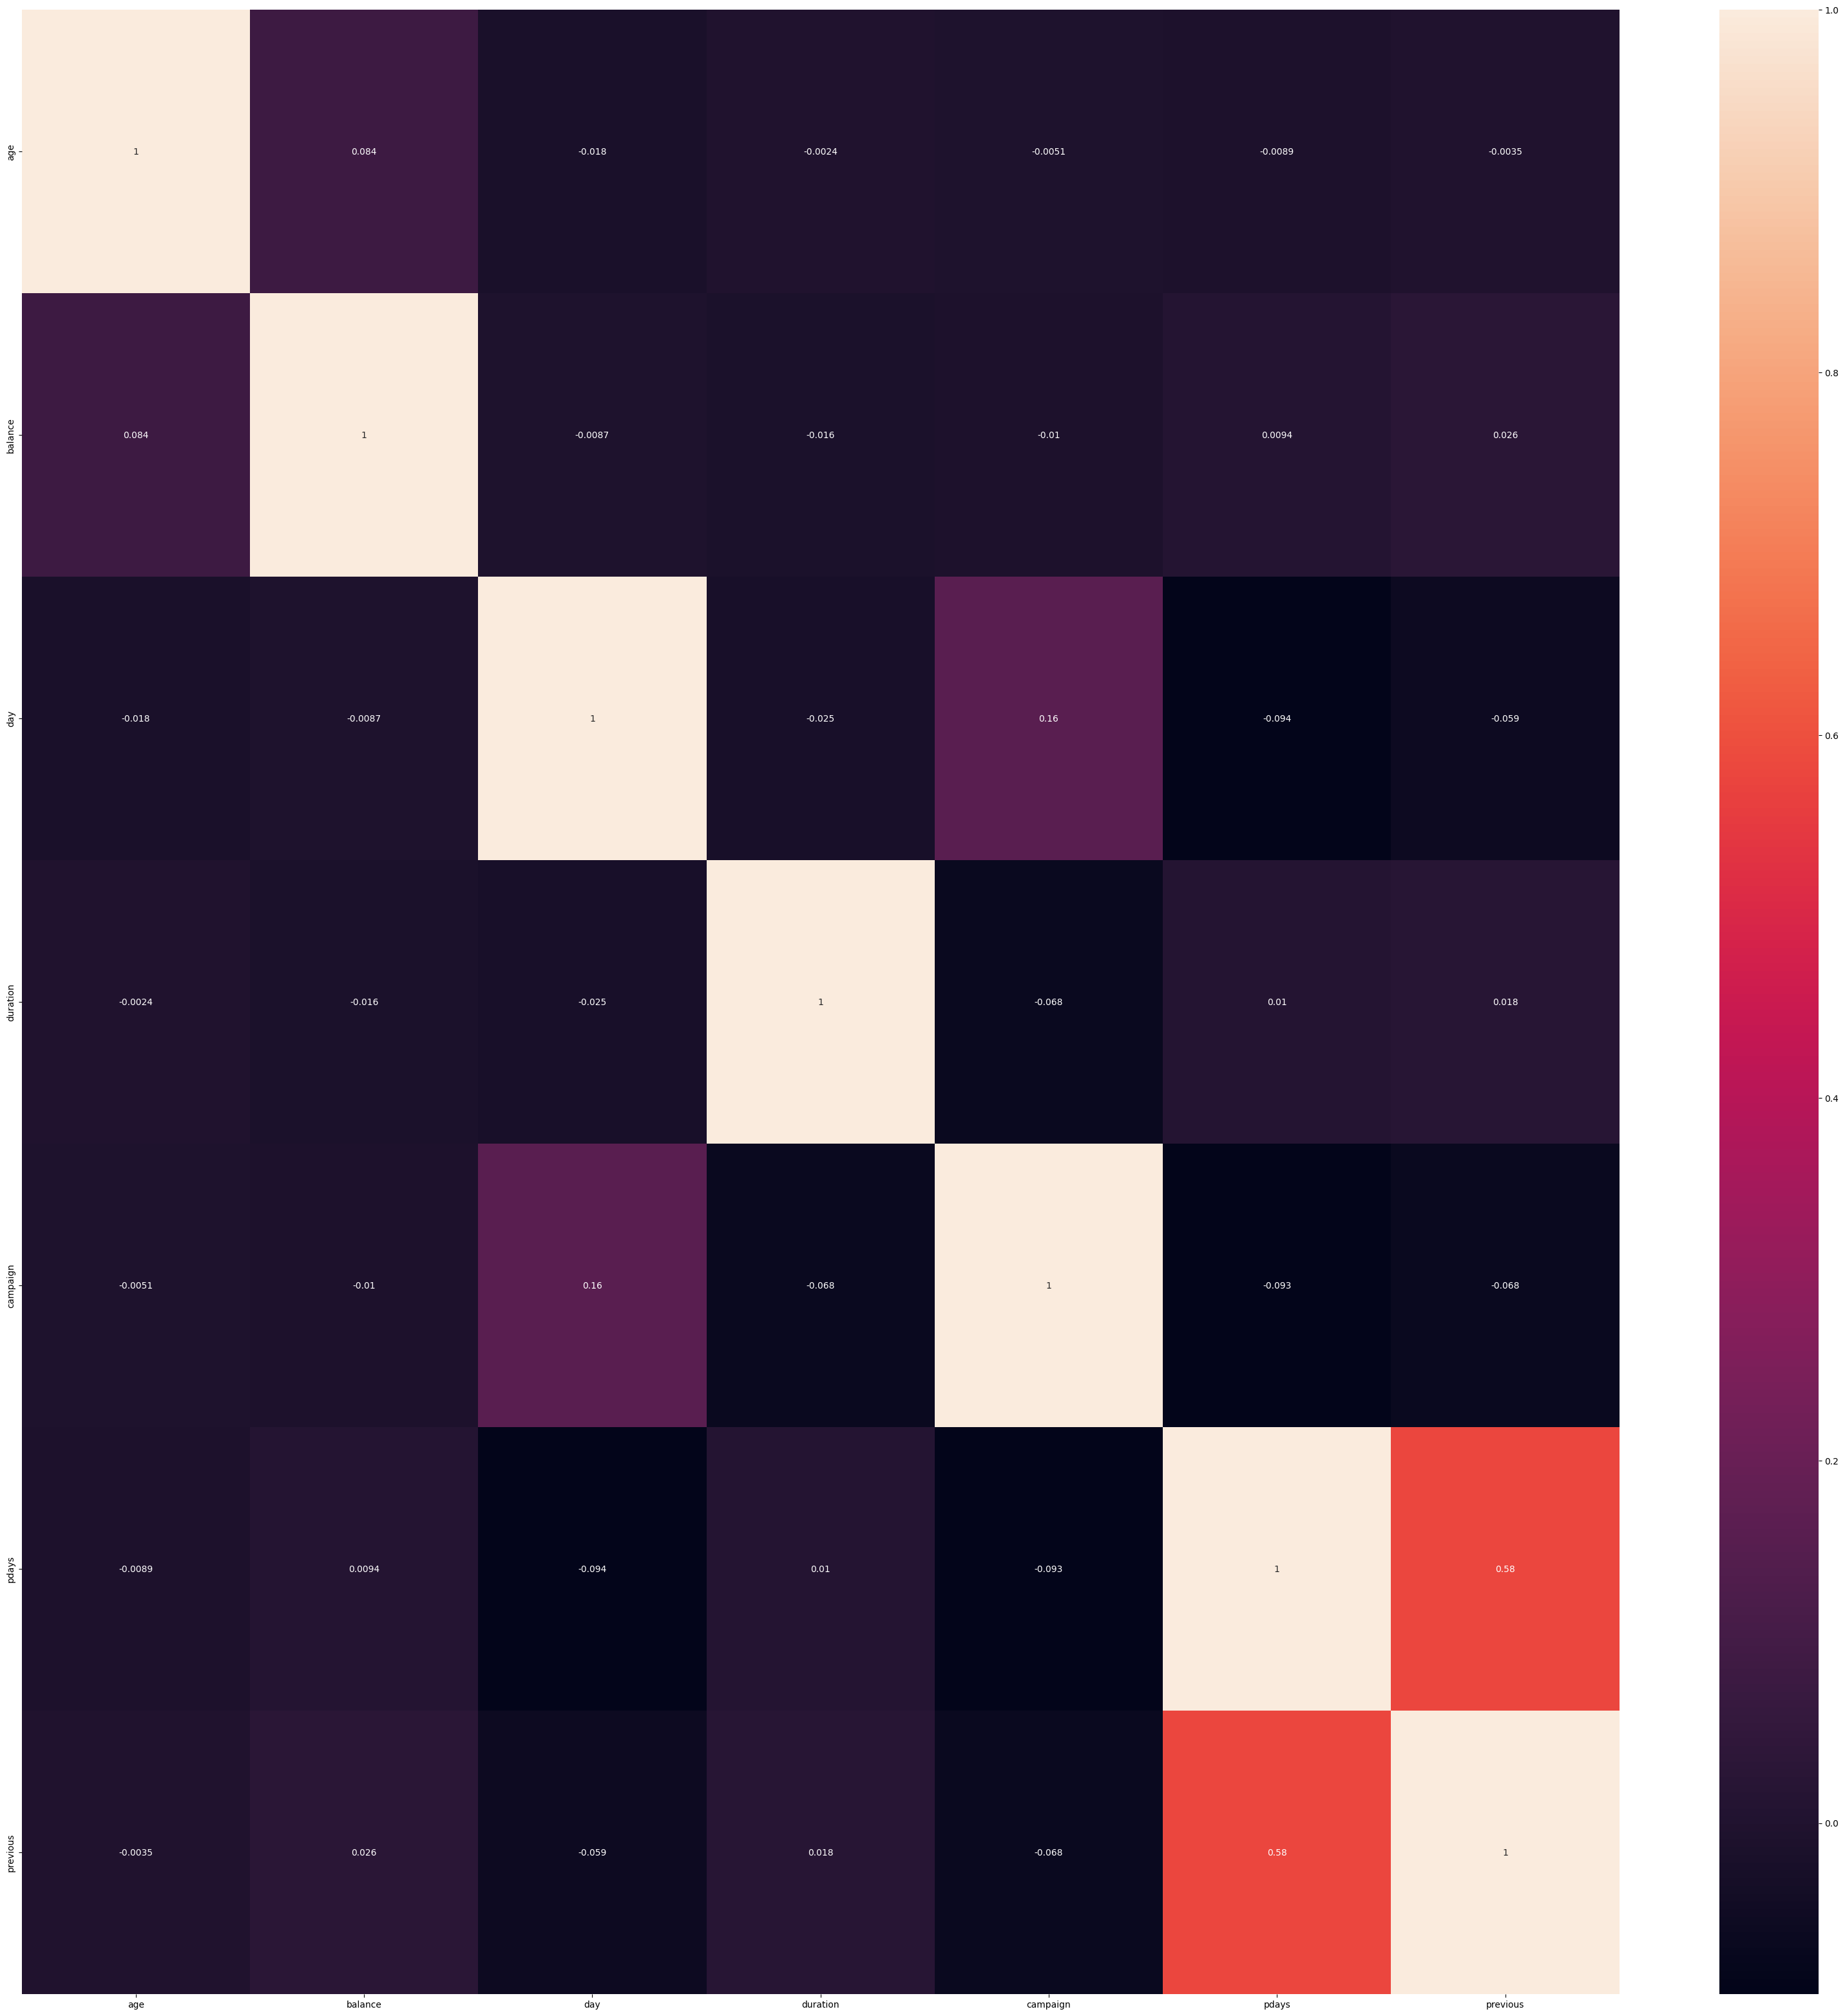

In [ ]:
plt.figure(figsize=(40,40))
sns.heatmap(check_out.corr(),annot=True)

In [ ]:
Bank.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,30,0,1787,0,0,19,79,1,-1,0,...,0,0,0,0,0,1,0,0,0,1
1,33,0,4789,1,1,11,220,1,339,4,...,0,0,0,1,0,0,0,0,0,0
2,35,0,1350,1,0,16,185,1,330,1,...,0,0,0,0,0,0,0,0,0,0
3,30,0,1476,1,1,3,199,4,-1,0,...,0,1,0,0,0,0,0,0,0,1
4,59,0,0,1,0,5,226,1,-1,0,...,0,0,0,1,0,0,0,0,0,1


In [ ]:
round((sum(Bank['y'])/len(Bank.index))*100,2)

11.52

In [ ]:
# Splitting the variables
X = Bank.drop(['y'],1)
Y = Bank['y']

<ipython-input-43-26b5dbd3e7c2>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = Bank.drop(['y'],1)


In [ ]:
X.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,30,0,1787,0,0,19,79,1,-1,0,...,0,0,0,0,0,1,0,0,0,1
1,33,0,4789,1,1,11,220,1,339,4,...,0,0,0,1,0,0,0,0,0,0
2,35,0,1350,1,0,16,185,1,330,1,...,0,0,0,0,0,0,0,0,0,0
3,30,0,1476,1,1,3,199,4,-1,0,...,0,1,0,0,0,0,0,0,0,1
4,59,0,0,1,0,5,226,1,-1,0,...,0,0,0,1,0,0,0,0,0,1


In [ ]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train, Y_test = train_test_split(X,Y, train_size = 0.7, test_size = 0.3, random_state=100)

In [ ]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
X_train[['age','balance','day','duration', 'campaign', 'pdays', 'previous']] = Scaler.fit_transform(X_train[['age','balance','day','duration', 'campaign', 'pdays', 'previous']])

In [ ]:
X_train.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
2085,-0.781696,0,-0.490292,1,0,1.447256,-0.427557,0.045752,-0.402013,-0.318746,...,1,0,0,0,0,0,0,0,0,1
1239,-1.259091,0,0.905722,1,1,-1.323076,-0.225129,-0.258364,-0.402013,-0.318746,...,0,0,0,1,0,0,0,0,0,1
130,-0.017865,0,-0.410863,1,0,0.242764,-0.292605,0.045752,-0.402013,-0.318746,...,0,0,0,0,1,0,0,0,0,1
2345,-1.450049,0,-0.299337,1,1,1.688155,-0.221381,0.653984,2.002237,1.486467,...,0,0,0,0,0,0,0,0,0,0
1296,1.605278,0,-0.464680,0,0,0.001865,1.570479,-0.562480,-0.402013,-0.318746,...,0,1,0,0,0,0,0,0,0,1


Model Building

In [ ]:
# Logistic Regression
import statsmodels.api as sm
logm = sm.GLM(Y_train,(sm.add_constant(X_train)),family = sm.families.Binomial())
logm.fit().summary()

In [ ]:
from sklearn.linear_model import LogisticRegression
Logreg = LogisticRegression()

In [ ]:
from sklearn.feature_selection import RFE
logreg = LogisticRegression()
rfe = RFE(estimator=logreg, n_features_to_select=20)
rfe = rfe.fit(X_train, Y_train)

In [ ]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('age', False, 223),
 ('default', True, 1),
 ('balance', False, 299),
 ('housing', False, 12),
 ('loan', True, 1),
 ('day', False, 185),
 ('duration', True, 1),
 ('campaign', False, 63),
 ('pdays', False, 231),
 ('previous', False, 229),
 ('job_blue-collar', False, 25),
 ('job_entrepreneur', False, 47),
 ('job_housemaid', False, 58),
 ('job_management', False, 265),
 ('job_retired', False, 178),
 ('job_self-employed', False, 50),
 ('job_services', False, 194),
 ('job_student', False, 264),
 ('job_technician', False, 155),
 ('job_unemployed', True, 1),
 ('job_unknown', False, 41),
 ('marital_married', False, 33),
 ('marital_single', False, 253),
 ('education_secondary', False, 198),
 ('education_tertiary', False, 9),
 ('education_unknown', False, 284),
 ('contact_telephone', False, 252),
 ('contact_unknown', False, 11),
 ('month_aug', False, 142),
 ('month_dec', False, 307),
 ('month_feb', False, 294),
 ('month_jan', False, 86),
 ('month_jul', True, 1),
 ('month_jun', False, 183),
 ('m

In [ ]:
col1 = X_train.columns[rfe.support_]
col1

Index(['default', 'loan', 'duration', 'job_unemployed', 'month_jul',
       'month_sep', 'poutcome_success', 'job_retired', 'contact_unknown',
       'month_aug', 'month_jul', 'month_may', 'poutcome_success', 'month_nov',
       'poutcome_success', 'poutcome_success', 'month_mar', 'contact_unknown',
       'month_jan', 'month_oct'],
      dtype='object')

In [ ]:
X_train.columns[~rfe.support_]

Index(['age', 'balance', 'housing', 'day', 'campaign', 'pdays', 'previous',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       ...
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object', length=310)

Model with StatsModel

In [ ]:
X_train_sm = sm.add_constant(X_train[col1])
logm1 = sm.GLM(Y_train,X_train_sm, family=sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 3164
Model:                            GLM   Df Residuals:                     3148
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -813.08
Date:                Fri, 08 Sep 2023   Deviance:                       1626.2
Time:                        13:06:02   Pearson chi2:                 3.79e+03
No. Iterations:                   100   Pseudo R-squ. (CS):             0.1967
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.5460      0.129    -11.977      0.000      -1.799      -1.293
default              0.7160      0.420      1.703      0.089      -0.108       1.540
loan                -0.7095      0.237     -2.988      0.003      -1.175      -0.244
duration             1.0067      0.057     17.642      0.000       0.895       1.119
job_unemployed      -0.0638      0.038     -1.660      0.097      -0.139       0.012
job_unemployed      -0.0638      0.038     -1.660      0.097      -0.139       0.012
job_unemployed      -0.0638      0.038     -1.660      0.097      -0.139       0.012
job_unemployed      -0.0638      0.038     -1.660      0.097      -0.139       0.012
job_unemployed      -0.0638      0.038     -1.660      0.097      -0.139       0.012
job_unemployed      -0.0638      0.038     -1.660      0.097      -0.139       0.012
job_unemployed      -0.0638      0.038     -1.660      0.097      -0.139       0.012
job_unemployed      -0.0638      0.038     -1.660      0.097      -0.139       0.012
job_unemployed      -0.0638      0.038     -1.660      0.097      -0.139       0.012
job_unemployed      -0.0638      0.038     -1.660      0.097      -0.139       0.012
month_jul           -0.0629      0.010     -6.112      0.000      -0.083      -0.043
month_jul           -0.0629      0.010     -6.112      0.000      -0.083      -0.043
month_jul           -0.0629      0.010     -6.112      0.000      -0.083      -0.043
month_jul           -0.0629      0.010     -6.112      0.000      -0.083      -0.043
month_jul           -0.0629      0.010     -6.112      0.000      -0.083      -0.043
month_jul           -0.0629      0.010     -6.112      0.000      -0.083      -0.043
month_jul           -0.0629      0.010     -6.112      0.000      -0.083      -0.043
month_jul           -0.0629      0.010     -6.112      0.000      -0.083      -0.043
month_jul           -0.0629      0.010     -6.112      0.000      -0.083      -0.043
month_jul           -0.0629      0.010     -6.112      0.000      -0.083      -0.043
month_sep            0.0712      0.045      1.595      0.111      -0.016       0.159
month_sep            0.0712      0.045      1.595      0.111      -0.016       0.159
month_sep            0.0712      0.045      1.595      0.111      -0.016       0.159
month_sep            0.0712      0.045      1.595      0.111      -0.016       0.159
month_sep            0.0712      0.045      1.595      0.111      -0.016       0.159
month_sep            0.0712      0.045      1.595      0.111      -0.016       0.159
month_sep            0.0712      0.045      1.595      0.111      -0.016       0.159
month_sep            0.0712      0.045      1.595      0.111      -0.016       0.159
month_sep            0.0712      0.045      1.595      0.111      -0.016       0.159
month_sep            0.

In [ ]:
Y_train_pred = res.predict(X_train_sm)
Y_train_pred[:10]

2085    0.037895
1239    0.031194
130     0.061267
2345    0.029985
1296    0.216526
318     0.132276
2461    0.109926
1764    0.045572
2636    0.033796
2578    0.054190
dtype: float64

In [ ]:
Y_train_pred = Y_train_pred.reshape(-1)
Y_train_pred[:10]

array([0.03789545, 0.03119356, 0.06126741, 0.0299848 , 0.216526  ,
       0.13227618, 0.10992572, 0.04557171, 0.03379583, 0.05419   ])

In [ ]:
Y_train_pred_final = pd.DataFrame({'Sub': Y_train.values,'Sub_prob':Y_train_pred})
Y_train_pred_final['Cust_id'] = Y_train.index
Y_train_pred_final.head(14)

,Sub,Sub_prob,Cust_id
0,0,0.037895,2085
1,0,0.031194,1239
2,0,0.061267,130
3,0,0.029985,2345
4,0,0.216526,1296
5,1,0.132276,318
6,0,0.109926,2461
7,0,0.045572,1764
8,0,0.033796,2636
9,0,0.054190,2578


In [ ]:
Y_train_pred_final['predict'] = Y_train_pred_final['Sub_prob'].map(lambda x: 1 if x>0.5 else 0)
Y_train_pred_final.head(10)

,Sub,Sub_prob,Cust_id,predict
0,0,0.037895,2085,0
1,0,0.031194,1239,0
2,0,0.061267,130,0
3,0,0.029985,2345,0
4,0,0.216526,1296,0
5,1,0.132276,318,0
6,0,0.109926,2461,0
7,0,0.045572,1764,0
8,0,0.033796,2636,0
9,0,0.054190,2578,0


In [ ]:
from sklearn import metrics
confusion = metrics.confusion_matrix(Y_train_pred_final.Sub, Y_train_pred_final.predict)
confusion

array([[2723,   62],
       [ 266,  113]])

In [ ]:
print(metrics.accuracy_score(Y_train_pred_final.Sub,Y_train_pred_final.predict))

0.8963337547408344


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values,i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by

,Features,VIF
86,month_may,inf
119,poutcome_success,inf
111,month_nov,inf
112,month_nov,inf
113,poutcome_success,inf
...,...,...
63,month_aug,inf
4,job_unemployed,inf
1,loan,1.23
0,default,1.02


In [ ]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(Y_train,X_train_sm, family=sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 3164
Model:                            GLM   Df Residuals:                     3148
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -813.08
Date:                Fri, 08 Sep 2023   Deviance:                       1626.2
Time:                        13:19:40   Pearson chi2:                 3.79e+03
No. Iterations:                   100   Pseudo R-squ. (CS):             0.1967
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.5460      0.129    -11.977      0.000      -1.799      -1.293
default              0.7160      0.420      1.703      0.089      -0.108       1.540
loan                -0.7095      0.237     -2.988      0.003      -1.175      -0.244
duration             1.0067      0.057     17.642      0.000       0.895       1.119
job_unemployed      -0.0638      0.038     -1.660      0.097      -0.139       0.012
job_unemployed      -0.0638      0.038     -1.660      0.097      -0.139       0.012
job_unemployed      -0.0638      0.038     -1.660      0.097      -0.139       0.012
job_unemployed      -0.0638      0.038     -1.660      0.097      -0.139       0.012
job_unemployed      -0.0638      0.038     -1.660      0.097      -0.139       0.012
job_unemployed      -0.0638      0.038     -1.660      0.097      -0.139       0.012
job_unemployed      -0.0638      0.038     -1.660      0.097      -0.139       0.012
job_unemployed      -0.0638      0.038     -1.660      0.097      -0.139       0.012
job_unemployed      -0.0638      0.038     -1.660      0.097      -0.139       0.012
job_unemployed      -0.0638      0.038     -1.660      0.097      -0.139       0.012
month_jul           -0.0629      0.010     -6.112      0.000      -0.083      -0.043
month_jul           -0.0629      0.010     -6.112      0.000      -0.083      -0.043
month_jul           -0.0629      0.010     -6.112      0.000      -0.083      -0.043
month_jul           -0.0629      0.010     -6.112      0.000      -0.083      -0.043
month_jul           -0.0629      0.010     -6.112      0.000      -0.083      -0.043
month_jul           -0.0629      0.010     -6.112      0.000      -0.083      -0.043
month_jul           -0.0629      0.010     -6.112      0.000      -0.083      -0.043
month_jul           -0.0629      0.010     -6.112      0.000      -0.083      -0.043
month_jul           -0.0629      0.010     -6.112      0.000      -0.083      -0.043
month_jul           -0.0629      0.010     -6.112      0.000      -0.083      -0.043
month_sep            0.0712      0.045      1.595      0.111      -0.016       0.159
month_sep            0.0712      0.045      1.595      0.111      -0.016       0.159
month_sep            0.0712      0.045      1.595      0.111      -0.016       0.159
month_sep            0.0712      0.045      1.595      0.111      -0.016       0.159
month_sep            0.0712      0.045      1.595      0.111      -0.016       0.159
month_sep            0.0712      0.045      1.595      0.111      -0.016       0.159
month_sep            0.0712      0.045      1.595      0.111      -0.016       0.159
month_sep            0.0712      0.045      1.595      0.111      -0.016       0.159
month_sep            0.0712      0.045      1.595      0.111      -0.016       0.159
month_sep            0.

In [ ]:
Y_train_pred = res.predict(X_train_sm)
Y_train_pred[:10]

2085    0.037895
1239    0.031194
130     0.061267
2345    0.029985
1296    0.216526
318     0.132276
2461    0.109926
1764    0.045572
2636    0.033796
2578    0.054190
dtype: float64

In [ ]:
Y_train_pred = Y_train_pred.values.reshape(-1)
Y_train_pred[:10]

array([0.03789545, 0.03119356, 0.06126741, 0.0299848 , 0.216526  ,
       0.13227618, 0.10992572, 0.04557171, 0.03379583, 0.05419   ])

In [ ]:
Y_train_pred_final = pd.DataFrame({'Sub':Y_train,'Sub_prob':Y_train_pred})
Y_train_pred_final['Cust_id'] = Y_train.index
Y_train_pred_final.head(10)

,Sub,Sub_prob,Cust_id
2085,0,0.037895,2085
1239,0,0.031194,1239
130,0,0.061267,130
2345,0,0.029985,2345
1296,0,0.216526,1296
318,1,0.132276,318
2461,0,0.109926,2461
1764,0,0.045572,1764
2636,0,0.033796,2636
2578,0,0.054190,2578


In [ ]:
Y_train_pred_final['predict'] = Y_train_pred_final['Sub_prob'].map(lambda x: 1 if x>0.5 else 0)
Y_train_pred_final.head(10)

,Sub,Sub_prob,Cust_id,predict
2085,0,0.037895,2085,0
1239,0,0.031194,1239,0
130,0,0.061267,130,0
2345,0,0.029985,2345,0
1296,0,0.216526,1296,0
318,1,0.132276,318,0
2461,0,0.109926,2461,0
1764,0,0.045572,1764,0
2636,0,0.033796,2636,0
2578,0,0.054190,2578,0


In [ ]:
confusion = metrics.confusion_matrix(Y_train_pred_final.Sub, Y_train_pred_final.predict)
print(confusion)

[[2723   62]
 [ 266  113]]


In [ ]:
print(metrics.accuracy_score(Y_train_pred_final.Sub, Y_train_pred_final.predict))

0.8963337547408344


In [ ]:
def draw_roc(actual,probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate=False)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Reciever operating characterstic example')
    plt.legend(loc='lower right')
    plt.show()

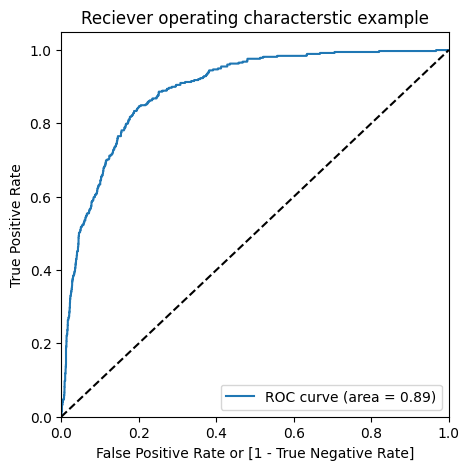

In [ ]:
draw_roc(Y_train_pred_final.Sub, Y_train_pred_final.Sub_prob)

Finding Optimal cut off

In [ ]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    Y_train_pred_final[i] = Y_train_pred_final.Sub_prob.map(lambda x: 1 if x>i else 0)
Y_train_pred_final.head()

,Sub,Sub_prob,Cust_id,predict,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
2085,0,0.037895,2085,0,1,0,0,0,0,0,0,0,0,0
1239,0,0.031194,1239,0,1,0,0,0,0,0,0,0,0,0
130,0,0.061267,130,0,1,0,0,0,0,0,0,0,0,0
2345,0,0.029985,2345,0,1,0,0,0,0,0,0,0,0,0
1296,0,0.216526,1296,0,1,1,1,0,0,0,0,0,0,0


In [ ]:
cutoff = pd.DataFrame(columns = ['prob','accuracy','sensi','speci'])
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(Y_train_pred_final.Sub, Y_train_pred_final[i])
    total1= sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff.loc[i] = [i, accuracy, sensi, speci]

print(cutoff)

     prob  accuracy     sensi     speci
0.0   0.0  0.119785  1.000000  0.000000
0.1   0.1  0.776549  0.865435  0.764452
0.2   0.2  0.871365  0.627968  0.904488
0.3   0.3  0.896650  0.517150  0.948294
0.4   0.4  0.896966  0.398417  0.964811
0.5   0.5  0.896334  0.298153  0.977738
0.6   0.6  0.895070  0.245383  0.983483
0.7   0.7  0.891277  0.182058  0.987792
0.8   0.8  0.882427  0.081794  0.991382
0.9   0.9  0.882111  0.039578  0.996768


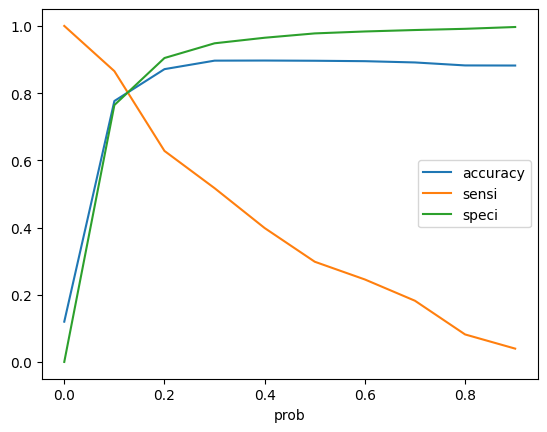

In [ ]:
cutoff.plot.line(x='prob',y=['accuracy','sensi','speci'])
plt.show()